In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import preprocessing

In [2]:
img = cv2.imread('/home/herry/下載/geodata.png')
img = img[:, :-200, :]

In [3]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(753, 1165, 3)


In [4]:
class Mask:
    def __init__(self, image, clusters):
        self.image = image
        self.clusters = clusters
        
    def pixel_cluster(self, img, clusters):
        X = img.reshape((-1, 1))
        k_means = cluster.KMeans(n_clusters=clusters)
        k_means.fit(X)

        X_cluster = k_means.labels_
        X_cluster = X_cluster.reshape(img.shape)
        return X_cluster

    def cluster_to_df(self):
        img = self.image
        clusters = self.clusters
        
        X_cluster = self.pixel_cluster(img, clusters)
        rgb_l = []
        for row in range(X_cluster.shape[0]):
            for col in range(X_cluster.shape[1]):
                rgb_l.append(X_cluster[row][col])
                
        df_tmp = pd.DataFrame(rgb_l)
        df_tmp['row'] = df_tmp.index // X_cluster.shape[1]
        df_tmp['col'] = df_tmp.index % X_cluster.shape[1]
        df_tmp['label'] = df_tmp[0] + df_tmp[1] * clusters  + df_tmp[2] * clusters ** 2
        return df_tmp

In [5]:
mask = Mask(img, 2)

In [6]:
df = mask.cluster_to_df()

In [7]:
le = preprocessing.LabelEncoder()
le.fit(df['label'])
df['label'] = le.transform(df['label'])
df['label'].value_counts()

7    404442
0    346995
5     76056
1     32429
4     15072
3      1942
6       250
2        59
Name: label, dtype: int64

In [8]:
mask = pd.pivot_table(df, index=['row'], columns=['col'], values=['label']).values
mask = np.where(mask != 7, 1, 0)

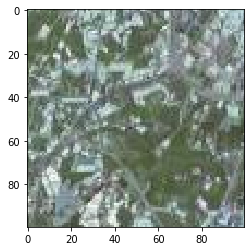

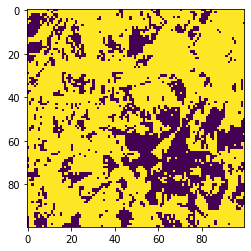

In [9]:
plt.imshow(img[:100, 500:600, :])
plt.show()
plt.imshow(mask[:100, 500:600])

In [12]:
cv2.imwrite('out.png', mask)

True

In [10]:
mask.shape

(753, 1165)

In [17]:
i = j = 0
for i in range(img.shape[0] // 72):
    for j in range(img.shape[1] // 72):
        cv2.imwrite(f'./image/{i*(img.shape[1] // 72) + j}.png', img[i*72: (i+1)*72, j*72: (j+1)*72, :])
        cv2.imwrite(f'./mask/{i*(img.shape[1] // 72) + j}.png', mask[i*72: (i+1)*72, j*72: (j+1)*72])
        print(i*(img.shape[1] // 72) + j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
